<h1> Sleep Health and Lifestyle </h1>

![Alt Text](Sleep_picture.jpg)

<h2> The Problem </h2>

Living in today's fast-paced world, sleep has become an overlooked components of our health. Poor sleep habits, rising stress levels, and sedantary routines and increasinly linked to various chronic health problems, however the roots of these sleep habits and disorders remained complex and multidimensional.

With this, organization and healthcare providers may need data-driven insights to understand different aspects that contribute to poor sleep, how it differentiates between different demographics, and what interventions are possible that might improve health outcomes.

🔍 
<i>How can we identify and address the key factors influencing poor sleep quality and sleep disorders across different demographics to support healthier living?</i>

<h3> Dataset Overview </h3>

The dataset consists of 400 indviduals and includes the following variables:

- Demographics: Person ID, Age, Gender, Occupation
- Sleep Metrics: Sleep Duration, Quality of Sleep (1-10), Sleep Disorder type
- Health Indicators: BMI Category, Blood Pressure, Heart Rate (bpm)
- Lifestyle Factors: Physical Activity (minutes/day), Stress Level (scale 1-10),

<h3> Analytical Questions </h3>

1. Which factors are most associated with low sleep quality?
2. How do sleep vary by age, gender, and occupation?
3. Is there a link between physical activity, stress levels, and duration?
4. Do individuals with better cardiovascular indicators (e.g. lower heart rate, normal blood pressur) sleep better?
5. What lifestyle patterns distinguish individuals without sleep disorders from those with insomnia or apnea?

<i>Source of dataset: <a>https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset</a></i>

<h4> Importing Packages and Loading the Dataset </h4>

In [24]:
#Importing packages and loading the dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Load the data
sleep = pd.read_csv('sleep.csv')
sleep.set_index('Person ID', inplace=True)

<h4> Cleaning the Dataset </h4>

In [25]:
sleep_transformed = sleep.copy()

# Transform the data
sleep_transformed['Gender'] = sleep_transformed['Gender'].astype('category')
sleep_transformed['Age'] = sleep_transformed['Age'].astype('int16')
sleep_transformed['Occupation'] = sleep_transformed['Occupation'].astype('category')
sleep_transformed['Sleep Duration (hours)'] = sleep_transformed['Sleep Duration (hours)'].astype('float32')
sleep_transformed['Physical Activity Level (minutes/day)'] = sleep_transformed['Physical Activity Level (minutes/day)'].astype('int16')
sleep_transformed['BMI Category'] = sleep_transformed['BMI Category'].astype('category')
sleep_transformed['Heart Rate (bpm)'] = sleep_transformed['Heart Rate (bpm)'].astype('int16')
sleep_transformed['Daily Steps'] = sleep_transformed['Daily Steps'].astype('int16')
sleep_transformed['Sleep Disorder'] = sleep_transformed['Sleep Disorder'].astype('category')

# Reorder the categories
sleep_transformed['BMI Category'] = sleep_transformed['BMI Category'].cat.set_categories(new_categories = ['Underweight', 'Normal', 'Overweight', 'Obese'], ordered = True)


#Checking data types
print(sleep_transformed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int16   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float32 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int16   
 6   Stress Level (scale: 1-10)             400 non-null    int64   
 7   BMI Category                           400 non-null    category
 8   Blood Pressure (systolic/diastolic)    400 non-null    object  
 9   Heart Rate (bpm)                       400 non-null    int16   
 10  Daily Steps                            400 non-null    int16   
 11

<h4>Exploratory Data Analysis</h4>

<i> What factors are most associated with low sleep quality?</i>

<Axes: >

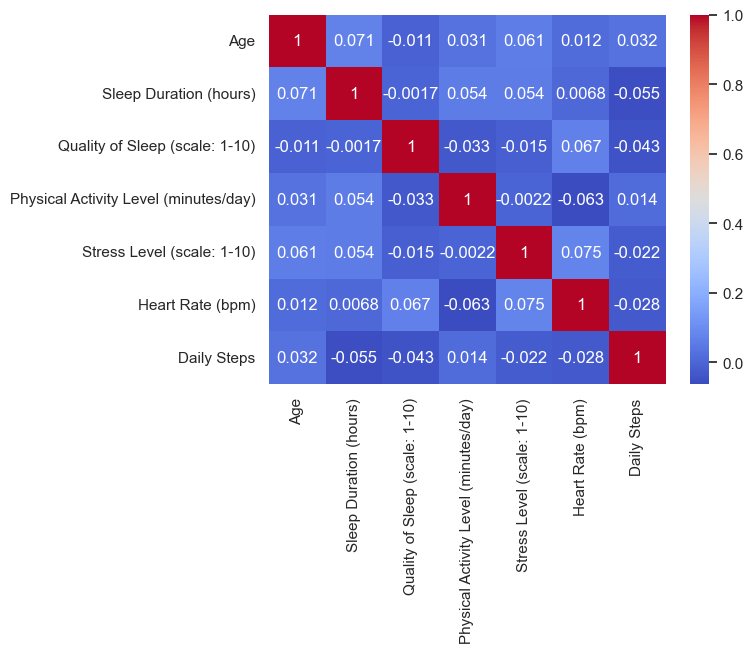

In [26]:
corr = sleep_transformed.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

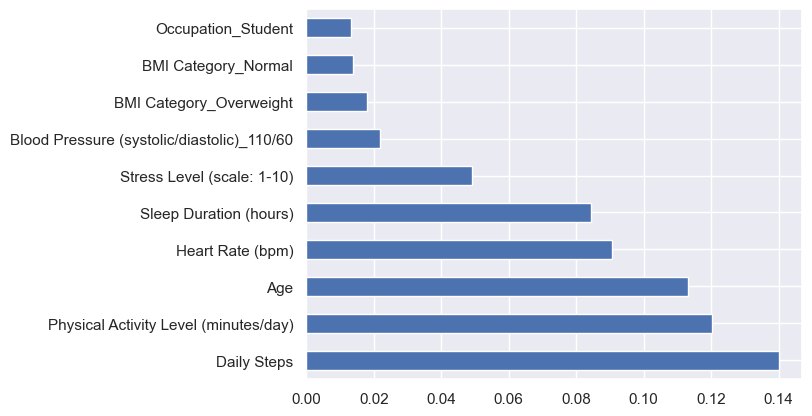

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sleep_encoded = pd.get_dummies(sleep_transformed, drop_first=True)

# Prepare data
X = sleep_encoded.drop(columns=['Quality of Sleep (scale: 1-10)'])
y = sleep_encoded['Quality of Sleep (scale: 1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')


TypeError: regplot() got an unexpected keyword argument 'alpha'

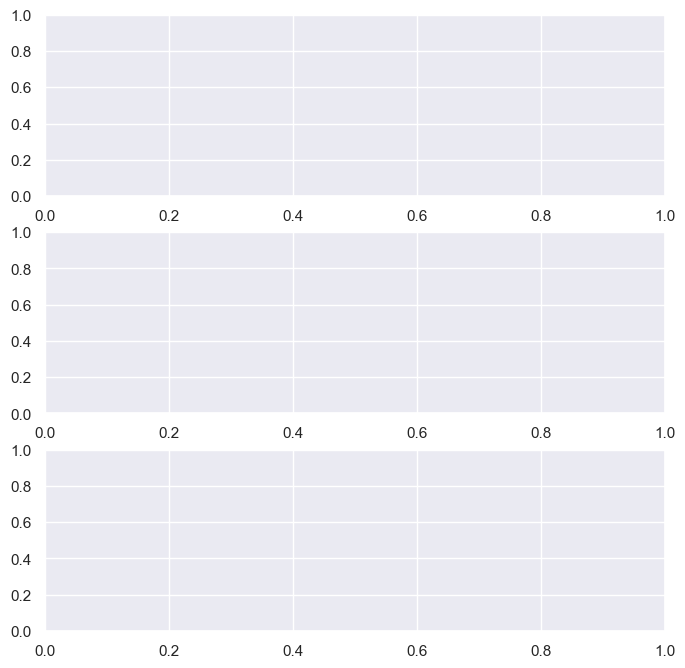

In [ ]:
fig, axes = plt.subplots(3, figsize = (8,8))
sns.set_theme(font_scale = 1)

ax1 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Daily Steps', data = sleep_transformed, ax= axes[0], scatter_kws={'alpha' : 0.2})
ax1.set_title('Quality of Sleep vs Daily Steps')

ax2 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Age', data = sleep_transformed, ax= axes[1], scatter_kws={'alpha' : 0.2})
ax2.set_title('Quality of Sleep vs Age')

ax3 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Physical Activity Level (minutes/day)', data = sleep_transformed, ax= axes[2], scatter_kws={'alpha' : 0.2})
ax3.set_title('Quality of Sleep vs Physical Activity Level')

fig.suptitle('Scatter Plots', fontsize = 20)
fig.tight_layout(pad=2.0)
plt.show()